**For data source click** <a href="https://archive.ics.uci.edu/ml/datasets/Hepatitis">Here<a/>

<br/> Author **Shereef Bankole**
<br/> **LinkedIn click** <a href="https://www.linkedin.com/in/shereef-b-b9aab823/\">Here<a/>
<br/> **Github click**  <a href="https://github.com/SAB-6\">Here<a/>

## Table of contents
- [Project objectives](#Project-objectives)
- [Data exploration](#Exploratory-data-analysis)
- [Data Wrangling](#Data-wrangling)
- [Data modelling](#Modelling)
- [Model Evaluation](#Model-evaluation)

## Import Required libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [12.0, 8.0]
mpl.rcParams['grid.color'] = 'k'
mpl.rcParams['grid.linestyle'] = ':'
mpl.rcParams.update({'font.size': 18})
!pip install lazypredict
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/hepatitis/hepatitis.data

--2020-07-21 20:37:08--  https://archive.ics.uci.edu/ml/machine-learning-databases/hepatitis/hepatitis.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7545 (7.4K) [application/x-httpd-php]
Saving to: ‘hepatitis.data.1’

hepatitis.data.1    100%[===================>]   7.37K  --.-KB/s    in 0s      

2020-07-21 20:37:09 (125 MB/s) - ‘hepatitis.data.1’ saved [7545/7545]



In [ ]:
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

## Project objectives

Predicting patient mortality due to hepatitis

## Exploratory data analysis/Data wrangling

In [5]:
data= pd.read_table('hepatitis.data', sep =',')
data.columns = ["Class", "AGE", "SEX", "STEROID", "ANTIVIRALS", "FATIGUE", "MALAISE", "ANOREXIA", "LIVER BIG", "LIVER FIRM",
                "SPLEEN PALPABLE", "SPIDERS", "ASCITES", "VARICES", "BILIRUBIN", "ALK PHOSPHATE", "SGOT", "ALBUMIN",
                "PROTIME", "HISTOLOGY"]
data.head()

,Class,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
0,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,?,1
1,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,?,1
2,2,31,1,?,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
3,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,?,200,4.0,?,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,0.90,95,28,4.0,75,1


In [6]:
# shuffle data
data = data.sample(frac = 1).reset_index(drop =True)

In [7]:
data.columns = data.columns.str.lower().str.replace(' ','_')
data.head()

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
0,2,30,1,1,2,2,2,2,2,2,2,2,2,2,0.70,100,31,4.0,100,1
1,1,33,1,1,2,1,1,2,2,2,2,2,1,2,0.70,63,80,3.0,31,2
2,2,41,1,2,1,1,2,2,2,1,2,2,2,2,0.90,81,60,3.9,52,1
3,1,44,1,1,2,1,1,2,2,2,1,2,2,1,0.90,135,55,?,41,2
4,1,61,1,1,2,1,1,2,?,?,2,1,2,2,?,?,?,?,?,2


In [8]:
# Inspecting the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154 entries, 0 to 153
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   class            154 non-null    int64 
 1   age              154 non-null    int64 
 2   sex              154 non-null    int64 
 3   steroid          154 non-null    object
 4   antivirals       154 non-null    int64 
 5   fatigue          154 non-null    object
 6   malaise          154 non-null    object
 7   anorexia         154 non-null    object
 8   liver_big        154 non-null    object
 9   liver_firm       154 non-null    object
 10  spleen_palpable  154 non-null    object
 11  spiders          154 non-null    object
 12  ascites          154 non-null    object
 13  varices          154 non-null    object
 14  bilirubin        154 non-null    object
 15  alk_phosphate    154 non-null    object
 16  sgot             154 non-null    object
 17  albumin          154 non-null    ob

### Both info and isnull methods did notr reveal the missing values within each attributes.  However, <a href ="https://archive.ics.uci.edu/ml/datasets/Hepatitis">the data source indicates presence of missing values within the dataset</a>.

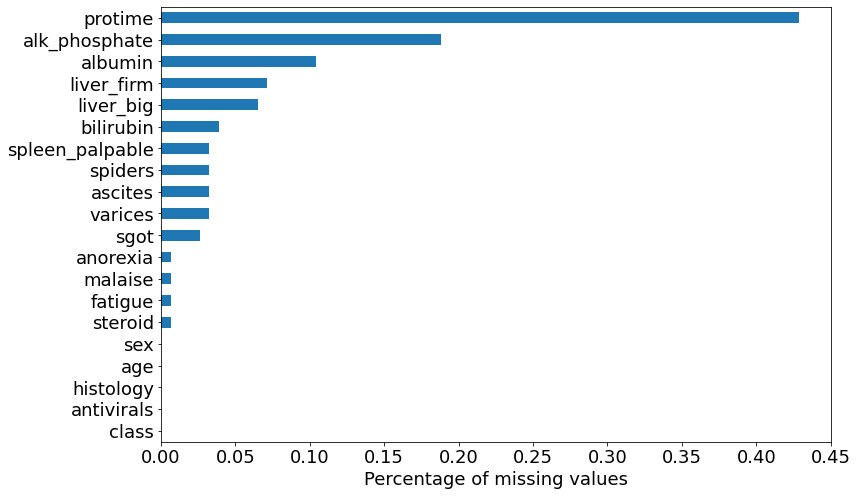

In [ ]:
(data.isnull().sum().sort_values()/len(data)).plot(kind = 'barh');
plt.xlabel("Percentage of missing values");

#### From the bar chart above, sex, age, histology, antivirals nad class attributes have no missing value. Missing values for other attributes varies from very few percentage to more than 40%

In [9]:
# replace missing values (np.nan) with zeros
data = data.replace("?",0)

# change some of the column to int type
int_columns = [col for col in list(data.columns) if data[col].dtypes != int if col not in ("bilirubin","albumin")]
data[int_columns] = data[int_columns].astype(int)

# change both bilirubin and albumin columns to float
data[['bilirubin','albumin']] = data[['bilirubin','albumin']].astype(float)
# check the data types
data.dtypes

class                int64
age                  int64
sex                  int64
steroid              int64
antivirals           int64
fatigue              int64
malaise              int64
anorexia             int64
liver_big            int64
liver_firm           int64
spleen_palpable      int64
spiders              int64
ascites              int64
varices              int64
bilirubin          float64
alk_phosphate        int64
sgot                 int64
albumin            float64
protime              int64
histology            int64
dtype: object

In [ ]:
data.isnull().sum().sort_values()

class              0
albumin            0
sgot               0
alk_phosphate      0
bilirubin          0
varices            0
ascites            0
spiders            0
spleen_palpable    0
liver_firm         0
liver_big          0
anorexia           0
malaise            0
fatigue            0
antivirals         0
steroid            0
sex                0
age                0
protime            0
histology          0
dtype: int64

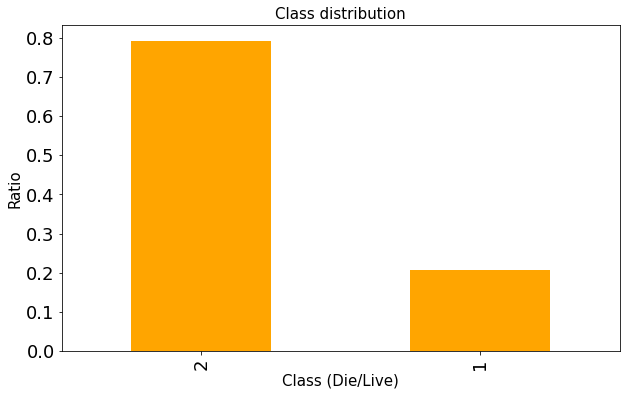

In [12]:
# Check for class imbalance in the target variable
(data['class'].value_counts()/len(data)).plot(kind='bar', color = 'orange',figsize=(10, 6), stacked=False)
plt.xlabel("Class (Die/Live)", fontsize=15)
plt.ylabel('Ratio', fontsize=15)
plt.title("Class distribution", fontsize=15);

### The target is skewed as indicated by the class distribution plot above. 2 represents the people tha lives while 1 represents those tha dies from hepatitis.

In [ ]:
data.age.max()

78

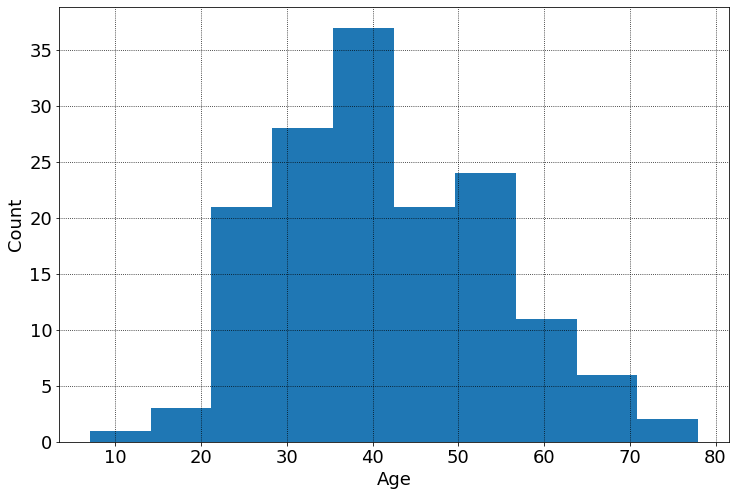

In [ ]:
#Age distribution
data["age"].hist()
plt.xlabel('Age')
plt.ylabel('Count');

### Age distribution shows normal distribution

In [ ]:
# pd.set_option("display.max_columns",None)
# pd.set_option("display.max_rows",None)

In [ ]:
# data.columns[data.dtypes=='O'].nunique()

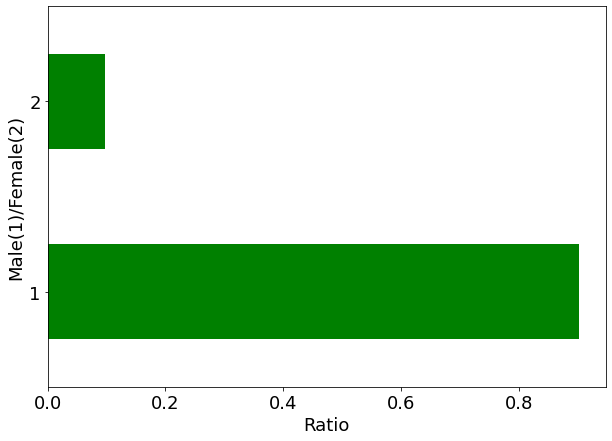

In [11]:
(data.sex.value_counts()/len(data)).plot(kind = "barh", figsize =(10,7), color = "green")
plt.xlabel("Ratio")
plt.ylabel("Male(1)/Female(2)");

#### There are about 80% more male than female

In [ ]:
# descriptive statistics
data.describe()

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
count,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000
mean,1.792208,41.272727,1.097403,1.500000,1.844156,1.337662,1.590909,1.779221,1.714286,1.467532,1.740260,1.603896,1.805195,1.818182,1.374675,85.623377,84.103896,3.419481,35.344156,1.454545
std,0.407051,12.574106,0.297473,0.514496,0.363891,0.488037,0.506347,0.431546,0.579771,0.627984,0.508814,0.553289,0.472484,0.463780,1.223600,62.264151,89.661686,1.321817,35.221870,0.499554
min,1.000000,7.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,32.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,0.700000,50.500000,31.000000,3.025000,0.000000,1.000000
50%,2.000000,39.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,83.000000,56.500000,3.900000,35.000000,1.000000
75%,2.000000,50.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.500000,119.750000,99.500000,4.200000,65.500000,2.000000
max,2.000000,78.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,8.000000,295.000000,648.000000,6.400000,100.000000,2.000000


In [ ]:
# Check features correlation with the target 
correlation = data.corr()
correlation.iloc[:,0].sort_values(ascending = False)

class              1.000000
ascites            0.331895
spiders            0.328650
malaise            0.314228
albumin            0.295469
fatigue            0.289698
varices            0.248646
spleen_palpable    0.179508
sex                0.168242
protime            0.158651
liver_firm         0.152417
steroid            0.124835
anorexia           0.109207
liver_big          0.106824
alk_phosphate     -0.050816
sgot              -0.054383
antivirals        -0.131803
age               -0.217434
histology         -0.336033
bilirubin         -0.423997
Name: class, dtype: float64

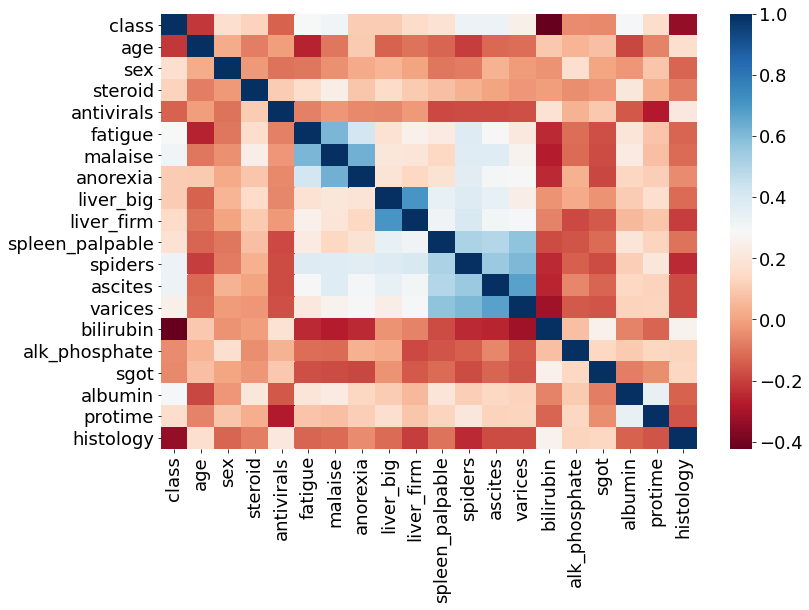

In [ ]:
# heatmap to highlight correction between features and the target
_= sns.heatmap(data[list(data.columns)].corr(), cmap='RdBu', annot= False)

In [13]:
labels = ["Less than 10","10-20","20-30","30-40","40-50","50-60","60-70","70 and more"]
databy_age = pd.cut(
        data["age"], bins = 8, labels = labels
    )

In [14]:
databy_age.value_counts()/len(data)

30-40           0.305195
40-50           0.214286
20-30           0.201299
50-60           0.116883
10-20           0.071429
60-70           0.064935
70 and more     0.019481
Less than 10    0.006494
Name: age, dtype: float64

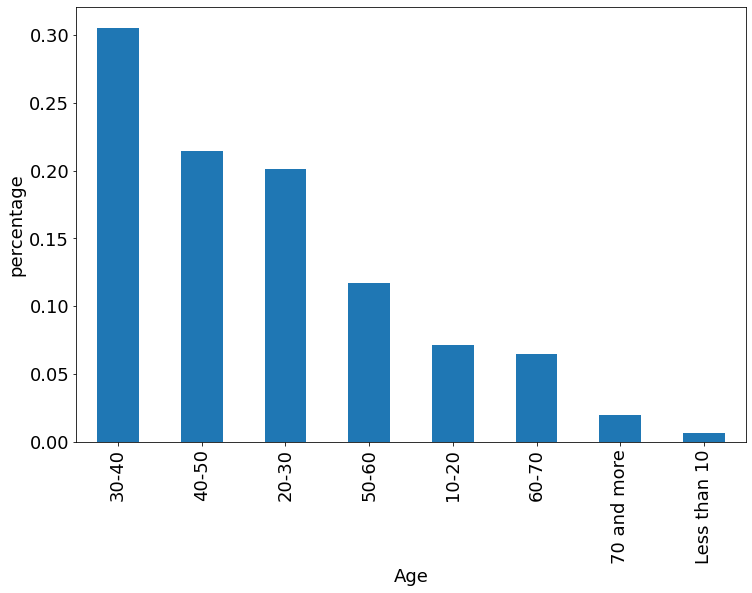

In [16]:
(databy_age.value_counts()/len(data)).plot(kind="bar")
plt.xlabel("Age")
plt.ylabel("percentage");

In [ ]:
list(data.columns)

['class',
 'age',
 'sex',
 'steroid',
 'antivirals',
 'fatigue',
 'malaise',
 'anorexia',
 'liver_big',
 'liver_firm',
 'spleen_palpable',
 'spiders',
 'ascites',
 'varices',
 'bilirubin',
 'alk_phosphate',
 'sgot',
 'albumin',
 'protime',
 'histology']

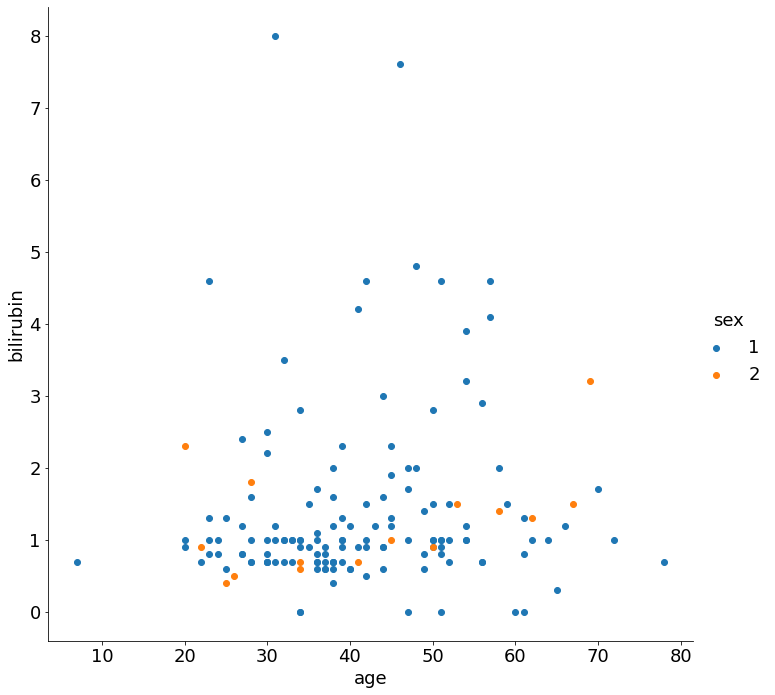

In [17]:
grid = sns.FacetGrid(data[["age", "bilirubin", "sex"]], hue="sex", size = 10)
grid.map(plt.scatter,"age","bilirubin").add_legend();

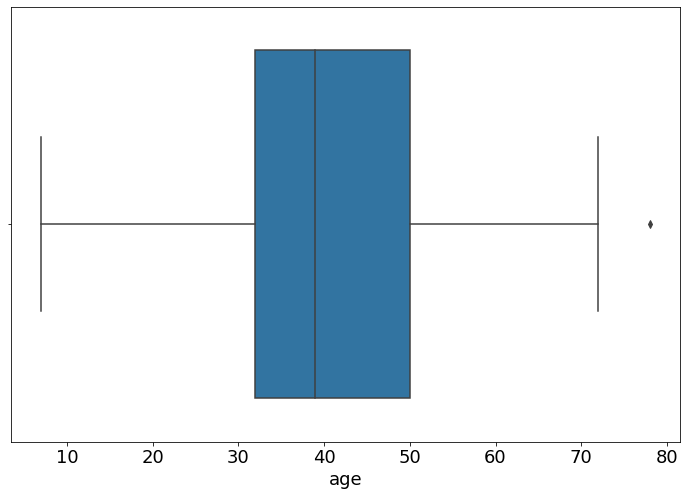

In [18]:
## Checking for outlier
sns.boxplot(data.age);

In [19]:
q1 = data.quantile(0.25)
q3 = data.quantile(0.75)
IQR = q3 - q1
print(IQR)

class               0.000
age                18.000
sex                 0.000
steroid             1.000
antivirals          0.000
fatigue             1.000
malaise             1.000
anorexia            0.000
liver_big           0.000
liver_firm          1.000
spleen_palpable     0.000
spiders             1.000
ascites             0.000
varices             0.000
bilirubin           0.800
alk_phosphate      69.250
sgot               68.500
albumin             1.175
protime            65.500
histology           1.000
dtype: float64


In [20]:
# No of outliers per column
((data < (q1 -1.5 * IQR)) | (data >(q3 + 1.5 * IQR))).sum()

class              32
age                 1
sex                15
steroid             0
antivirals         24
fatigue             0
malaise             0
anorexia           33
liver_big          34
liver_firm          0
spleen_palpable    35
spiders             0
ascites            25
varices            23
bilirubin          17
alk_phosphate       5
sgot               13
albumin            17
protime             0
histology           0
dtype: int64

In [25]:
data_no_outlier = (data[~((data < (q1 -1.5 * IQR)) | (data >(q3 + 1.5 * IQR))).any(axis=1)]).reset_index(drop = True)
data_no_outlier.head(20)

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
0,2,30,1,1,2,2,2,2,2,2,2,2,2,2,0.7,100,31,4.0,100,1
1,2,42,1,2,2,2,2,2,2,2,2,2,2,2,0.9,60,63,4.7,47,1
2,2,33,1,2,2,2,2,2,2,2,2,2,2,2,1.0,46,90,4.4,60,1
3,2,40,1,1,2,1,2,2,2,1,2,2,2,2,0.6,62,166,4.0,63,1
4,2,30,1,1,2,1,1,2,2,1,2,1,2,2,0.8,147,128,3.9,100,2
5,2,30,1,2,2,2,2,2,2,2,2,2,2,2,1.0,0,120,3.9,0,1
6,2,32,1,2,2,2,2,2,2,2,2,2,2,2,0.7,102,64,4.0,90,1
7,2,49,1,2,2,1,1,2,2,2,2,2,2,2,0.8,103,43,3.5,66,1
8,2,24,1,1,2,1,2,2,2,2,2,2,2,2,1.0,0,34,4.1,0,2
9,2,52,1,1,2,1,2,2,2,2,2,2,2,2,1.0,85,30,4.0,0,2


In [49]:
#data_no_outlier = data[~((data < (q1 -1.5 * IQR)) | (data >(q3 + 1.5 * IQR))).any(axis=1)]
#data_no_outlier.head(20)

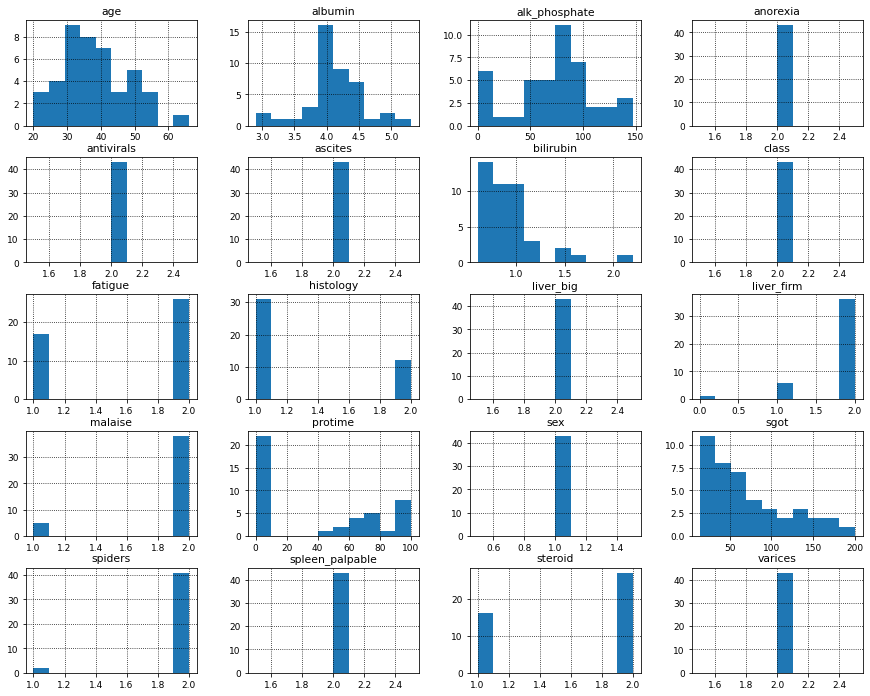

In [26]:
mpl.rcParams['figure.figsize'] = [15, 12]
mpl.rcParams['grid.color'] = 'k'
mpl.rcParams['grid.linestyle'] = ':'
mpl.rcParams.update({'font.size': 9})
data_no_outlier.hist();

## Data modelling

In [41]:
# from sklearn.datasets import load_breast_cancer
# df = load_breast_cancer()
# X = df.data
# y= df.target
# X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.5,random_state =123)
# #clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
# print(X_train)
# print(y_train)

In [30]:
features_col = list(data.columns)[1:]
target_col = ["class"] 
features = data[features_col]
target = data[target_col]

In [39]:
X_train, X_test, y_train, y_test = train_test_split(
    features,target,test_size= 0.3,
    stratify=target,random_state=42
    )
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
models

100%|██████████| 30/30 [00:00<00:00, 32.55it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LabelPropagation,0.83,0.82,0.82,0.84,0.01
LabelSpreading,0.83,0.82,0.82,0.84,0.02
SVC,0.87,0.77,0.77,0.87,0.01
RandomForestClassifier,0.81,0.73,0.73,0.81,0.15
ExtraTreesClassifier,0.81,0.73,0.73,0.81,0.11
BernoulliNB,0.74,0.73,0.73,0.76,0.01
NearestCentroid,0.68,0.72,0.72,0.71,0.02
DecisionTreeClassifier,0.79,0.72,0.72,0.79,0.01
PassiveAggressiveClassifier,0.77,0.71,0.71,0.78,0.01


## Use data without outliers. In the process of removing outliers, the second class was removed, which mean the the data now contain a single class.

In [42]:
# features_col = list(data.columns)[1:]
# target_col = ["class"] 
# features1 = data_no_outlier[features_col]
# target1 = data_no_outlier[target_col]

In [60]:
# X_train, X_test, y_train, y_test = train_test_split(
#     features1,target1,test_size= 0.3,
#     stratify=target1,random_state=42
#     )
# clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
# models,predictions = clf.fit(X_train, X_test, y_train, y_test)
# models

In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [48]:
y_train

,class
13,2
40,2
34,2
3,2
1,2
26,2
6,2
39,2
9,2
31,2


In [50]:
X_train, X_test, y_train, y_test = train_test_split(
    features,target,test_size= 0.3,
    stratify=target,random_state=42
    )

In [53]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
pred_lr = lr.predict(X_test)

In [55]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred_lr))

              precision    recall  f1-score   support

           1       0.40      0.40      0.40        10
           2       0.84      0.84      0.84        37

    accuracy                           0.74        47
   macro avg       0.62      0.62      0.62        47
weighted avg       0.74      0.74      0.74        47



In [58]:
y_train.shape, X_train.shape

((107, 1), (107, 19))

In [59]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
pred_rf = rf.predict(X_test)
print(classification_report(y_test,pred_rf))

              precision    recall  f1-score   support

           1       0.50      0.50      0.50        10
           2       0.86      0.86      0.86        37

    accuracy                           0.79        47
   macro avg       0.68      0.68      0.68        47
weighted avg       0.79      0.79      0.79        47



## Features selection

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection  import chi2

In [ ]:
list(data.columns)[1:]

['age',
 'sex',
 'steroid',
 'antivirals',
 'fatigue',
 'malaise',
 'anorexia',
 'liver_big',
 'liver_firm',
 'spleen_palpable',
 'spiders',
 'ascites',
 'varices',
 'bilirubin',
 'alk_phosphate',
 'sgot',
 'albumin',
 'protime',
 'histology']

In [ ]:
features_col = list(data.columns)[1:]
target_col = ["class"] 
features = data[features_col]
target = data[target_col]

In [ ]:
# using Skbest
skb = SelectKBest(score_func=chi2,k=5)
best_feature_fit = skb.fit(features,target)
# Highest score shows the best fit
print("Scores",best_feature_fit.scores_)

Scores [ 27.7100895    0.34920943   0.42076503   0.19084796   2.28634808
   2.43463115   0.19099258   0.34234119   0.95514018   0.73343834
   3.154178     2.08420804   1.11903176  29.95678238  17.88875131
  43.25275806   6.8249348  135.17120971   2.96410733]


In [ ]:
score = pd.DataFrame(best_feature_fit.scores_, columns = ["score"])
feat = pd.DataFrame(features_col, columns = ["feature_names"])
feat_scores = pd.concat([feat, score], axis = 1)
feat_scores.nlargest(10, "score" )

,feature_names,score
17,protime,135.171210
15,sgot,43.252758
13,bilirubin,29.956782
0,age,27.710090
14,alk_phosphate,17.888751
16,albumin,6.824935
10,spiders,3.154178
18,histology,2.964107
5,malaise,2.434631
4,fatigue,2.286348


## Model evaluation